### Gera os gráficos das bases de dados coletadas

In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
dataNames = [
    "PETR3_B_0_30min", 
    "WDOFUT_F_0_30min", 
    "WINFUT_F_0_30min",
]

setDivision = [0.1, 0.7, 0.2]              # Size of the [optimization, train, test] set
outputName  = "Fechamento"                 # Name of the output variable0

dir_name = f"../Results/datasPlots"
if not os.path.exists(dir_name):
    os.makedirs(dir_name)

for dataName in dataNames:
    Y = pd.read_csv(f'../Data/Generated/{dataName}_OUT.csv', sep=";")['OutPut |T+1|']
    plt.figure(figsize=(10, 5))
    plt.plot(Y)
    plt.axvline(x=len(Y) * 0.1, color='red', linestyle='--')
    plt.axvline(x=len(Y) * 0.8, color='blue', linestyle='--')
    plt.text(len(Y) * -0.03, Y.max() * 1, 'Otimização', color='red')
    plt.text(len(Y) * 0.38, Y.max() * 1, 'Treinamento', color='black')
    plt.text(len(Y) * 0.90, Y.max() * 1, 'Teste', color='blue')
    plt.legend()
    # plt.title(f"Ativo {dataName.split('_')[0]}")
    plt.xticks([])
    plt.xlabel("Amostras")
    plt.ylabel("Valor (R$)")
    plt.savefig(f"{dir_name}/{dataName.split('_')[0]}_fechamento.png")
    plt.close()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


### Verifica os melhores modelos para cada base de dados

In [4]:
from models_classification import GetModelsClassification
from models_regression2 import GetModelsRegression

dataNames = [
    "PETR3_B_0_30min", 
    "PETR3_B_0_60min", 

    "WDOFUT_F_0_30min", 
    "WDOFUT_F_0_60min", 

    "WINFUT_F_0_30min",
    "WINFUT_F_0_60min",
]

for dataName in dataNames:
    SVM, KNN, LR = GetModelsClassification(dataName)        # Obtém os modelos de classificação
    LSTM, MLP, RNN = GetModelsRegression(dataName)          # Obtém os modelos de regressão

    print(f"-------- Modelos definidos para a base de dados {dataName} --------")
    print(f"Modelos de classificação: ")
    print(f"Modelo SVM: {SVM.get_params()}")
    print(f"Modelo KNN: {KNN.get_params()}")
    print(f"Modelo LR: {LR.get_params()}", end="\n\n")
    print(f"Modelos de regressão: ")
    print(f"Modelo MLP: {[camada.units for camada in MLP.layers]}")
    print(f"Modelo RNN: {[camada.units if hasattr(camada, 'units') else 0 for camada in RNN.layers]}")
    print(f"Modelo LSTM: {[camada.units for camada in LSTM.layers]}")
    print(f"-------------------------------------------------------------------", end="\n\n")

-------- Modelos definidos para a base de dados PETR3_B_0_30min --------
Modelos de classificação: 
Modelo SVM: {'C': 15.01, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 1, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'poly', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Modelo KNN: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 17, 'p': 2, 'weights': 'uniform'}
Modelo LR: {'C': 1000, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 50, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': True}

Modelos de regressão: 
Modelo MLP: [60, 12, 44, 60, 1]
Modelo RNN: [112, 0, 80, 0, 80, 0, 96, 0, 1]
Modelo LSTM: [40, 80, 60, 1]
------------------

### Gera tabelas de comparação para modelos de regressão

In [5]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd
import os

dataNames = [
    "PETR3_B_0_30min", 
    "WDOFUT_F_0_30min", 
    "WINFUT_F_0_30min",

    "PETR3_B_0_60min", 
    "WDOFUT_F_0_60min", 
    "WINFUT_F_0_60min",
]

setDivision = [0.1, 0.7, 0.2]              # Size of the [optimization, train, test] set
outputName  = "Fechamento"                 # Name of the output variable0

dir_name = f"../Results/test/logs/regression"
if not os.path.exists(dir_name):
    os.makedirs(dir_name)

for dataName in dataNames:
    res = pd.DataFrame(columns=['Model', 'MAE', 'RMSE'])
    datasRegression = pd.read_csv(f'../Results/test/regression/{dataName}_predictions.csv', sep=";")
    datasStatistics = pd.read_csv(f'../Results/test/statistic/{dataName}_predictions.csv', sep=";")
    outDatas = pd.read_csv(f'../Data/Cut/statistic/Y/Test_{dataName}.csv', sep=";")['OutPut |T+1|']
    datas = pd.concat([datasRegression, datasStatistics], axis=1)
    print("Data Name:       ", dataName)
    print("Datas Shape:     ", datas.shape)
    print("OutDatas Shape:  ", outDatas.shape)
    for colum in datas.columns:
        mae = mean_absolute_error(outDatas, datas[colum])
        rmse = np.sqrt(mean_squared_error(outDatas, datas[colum]))
        res = pd.concat([res, pd.DataFrame([[colum, mae, rmse]], columns=['Model', 'MAE', 'RMSE'])], axis=0)
    res.to_csv(f"{dir_name}/{dataName}.csv", sep=";", index=False)

Data Name:        PETR3_B_0_30min
Datas Shape:      (1342, 6)
OutDatas Shape:   (1342,)
Data Name:        WDOFUT_F_0_30min
Datas Shape:      (1610, 6)
OutDatas Shape:   (1610,)
Data Name:        WINFUT_F_0_30min
Datas Shape:      (1610, 6)
OutDatas Shape:   (1610,)
Data Name:        PETR3_B_0_60min
Datas Shape:      (683, 6)
OutDatas Shape:   (683,)
Data Name:        WINFUT_F_0_60min
Datas Shape:      (802, 6)
OutDatas Shape:   (802,)


## Exibe logs para modelos treinados

In [6]:
import os 
import pandas as pd
# print("Operations History:        \n", operationsHistory.to_string(index=False))

path = "../Results/test/logs/class"
files = os.listdir(path)
for file in files:
    if file.endswith(".csv"):
        print(f"================================================ {file} ===========================================================")
        df = pd.read_csv(path+"/"+file, sep=";")
        print(df.to_string(index=False), end="\n\n")


================================================ WDOFUT_F_0_30min_logs.csv ===========================================================
                  model  qtdBuying  inirialValue  finalValue  percentual  accuracy       f1  truePositives  trueNegatives  falsePositives  falseNegatives
                    SVM        176          1000  894.954269  -10.504573  0.522981 0.583965          303.0          539.0           509.0           259.0
                    KNN        326          1000 1004.458237    0.445824  0.540994 0.517939          474.0          397.0           338.0           401.0
                     LR        191          1000  869.545604  -13.045440  0.514907 0.557005          338.0          491.0           474.0           307.0
                   LSTM          0          1000 1000.000000    0.000000  0.504348 0.000000          812.0            0.0             0.0           798.0
                    MLP          0          1000 1000.000000    0.000000  0.504348 0.000000    

### Exibe logs de regressão

In [7]:
import os 
import pandas as pd
# print("Operations History:        \n", operationsHistory.to_string(index=False))

path = "../Results/test/logs/regression"
files = os.listdir(path)
for file in files:
    if file.endswith(".csv"):
        print(f"================================================ {file} ===========================================================")
        df = pd.read_csv(path+"/"+file, sep=";")
        print(df.to_string(index=False), end="\n\n")

================================================ WINFUT_F_0_30min.csv ===========================================================
 Model       MAE      RMSE
  LSTM  9.788744 11.890135
   MLP  5.860962  6.624319
   RNN 11.768191 13.477410
 ARIMA  0.334360  0.472185
SARIMA  0.340123  0.480152
 GARCH  1.894884  2.525112

================================================ WDOFUT_F_0_30min.csv ===========================================================
 Model        MAE       RMSE
  LSTM 839.110573 853.491720
   MLP 447.731665 474.191337
   RNN 926.944676 940.012064
 ARIMA   9.663642  13.786633
SARIMA   9.837974  13.986968
 GARCH  50.555641  64.577240

================================================ PETR3_B_0_60min.csv ===========================================================
 Model      MAE     RMSE
  LSTM 4.384572 4.604054
   MLP 3.433179 3.709414
   RNN 4.510375 4.724041
 ARIMA 0.079205 0.114771
SARIMA 0.079692 0.114520
 GARCH 0.604997 0.836969

=========================================

## Exibe logs para estratégias implementadas

In [8]:
import os 
import pandas as pd
# print("Operations History:        \n", operationsHistory.to_string(index=False))

path = "../Results/test/logs/economic"
files = os.listdir(path)
for file in files:
    if file.endswith(".csv"):
        print(f"================================================ {file} ===========================================================")
        df = pd.read_csv(path+"/"+file, sep=";")
        print(df.to_string(index=False), end="\n\n")

================================================ ensamble2_buying.csv ===========================================================
                         model  qtdBuying  inirialValue  finalValue  percentual
    strat_TCC_WINFUT_F_0_30min        223          1000  905.857587   -9.414241
strat_hurwicz_WINFUT_F_0_30min          1          1000 1181.388929   18.138893
                  Buy and Hold          1          1000 1178.706030   17.870603
    strat_TCC_WDOFUT_F_0_60min        151          1000  986.707845   -1.329216
strat_hurwicz_WDOFUT_F_0_60min          1          1000 1100.112004   10.011200
                  Buy and Hold          1          1000 1100.003755   10.000376
    strat_TCC_WDOFUT_F_0_30min          0          1000 1000.000000    0.000000
strat_hurwicz_WDOFUT_F_0_30min          1          1000  936.769115   -6.323089
                  Buy and Hold          1          1000  935.788518   -6.421148
     strat_TCC_PETR3_B_0_60min         95          1000 1003.662808   

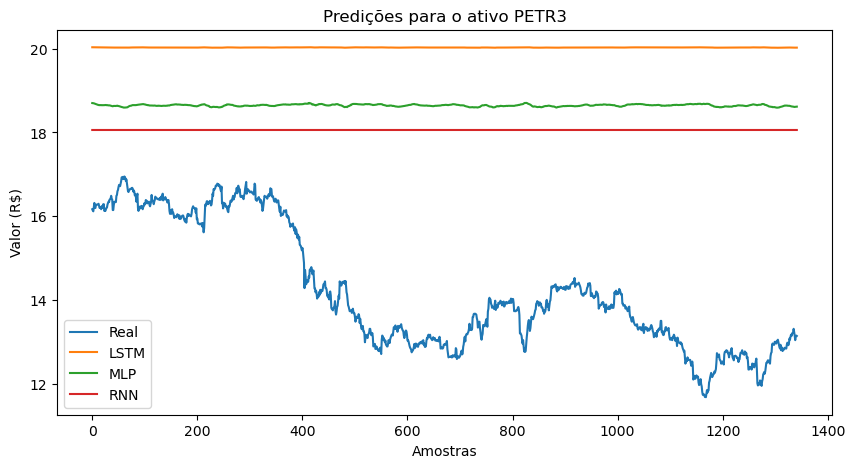

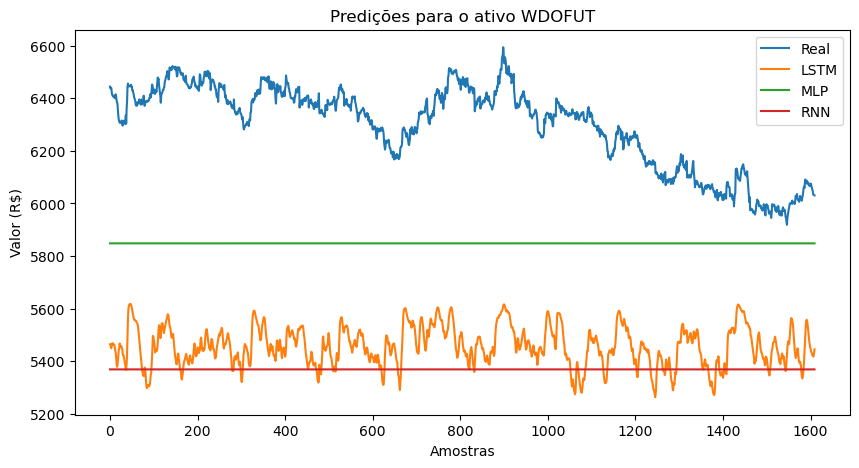

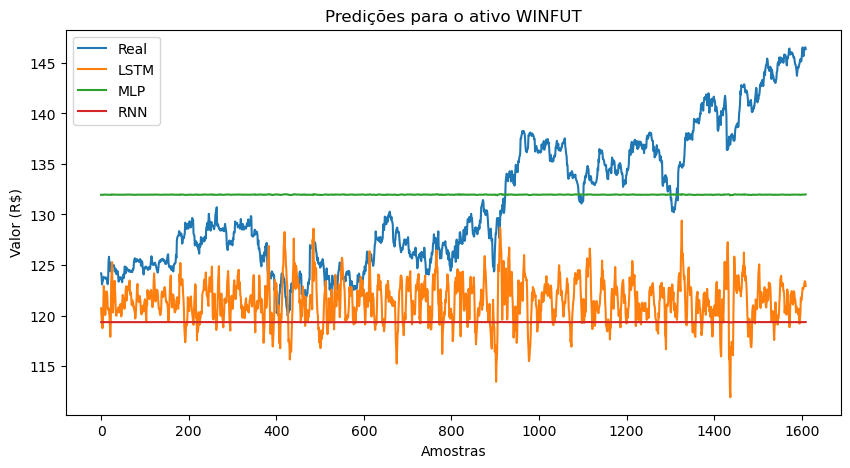

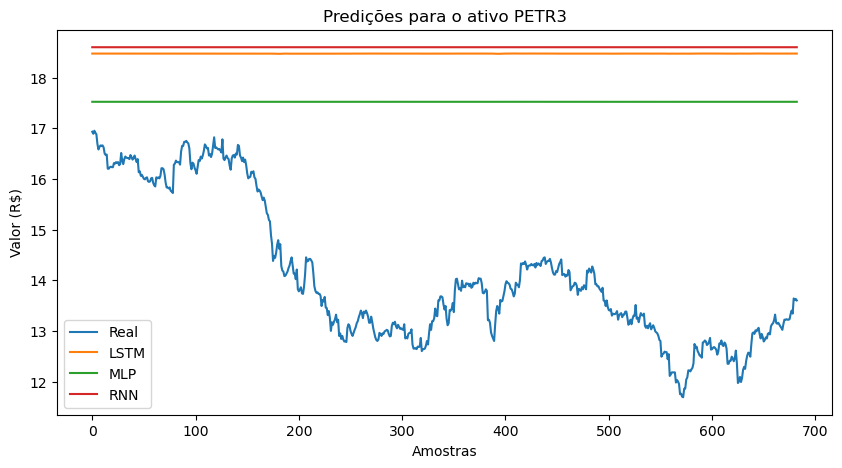

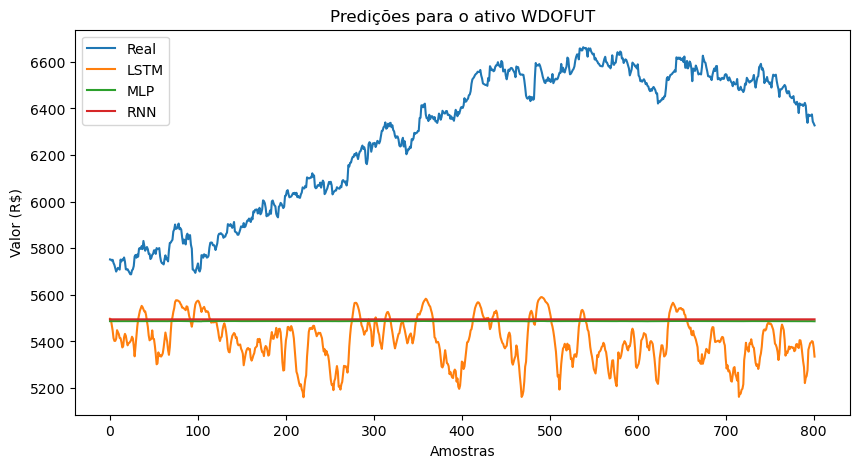

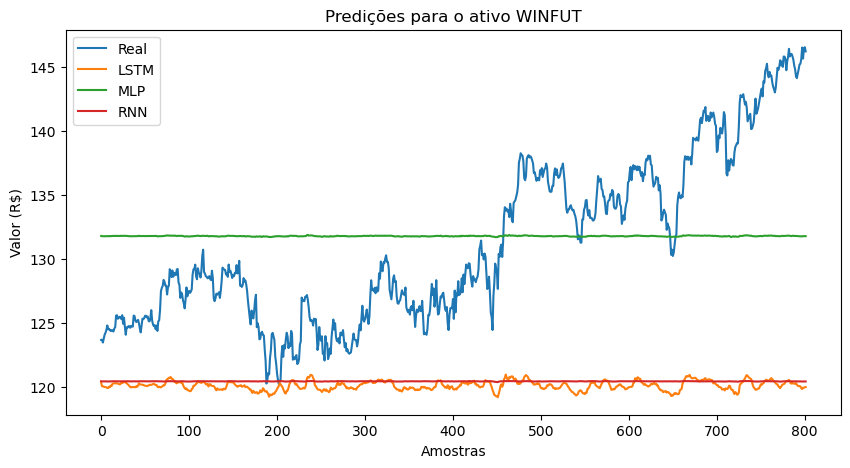

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

dataNames = [
    "PETR3_B_0_30min", 
    "WDOFUT_F_0_30min", 
    "WINFUT_F_0_30min",

    "PETR3_B_0_60min", 
    "WDOFUT_F_0_60min", 
    "WINFUT_F_0_60min",
]

for dataName in dataNames:
    predictions = pd.read_csv(f'../Results/test/regression/{dataName}_predictions.csv', sep=";")
    real = pd.read_csv(f'../Data/Cut/statistic/Y/Test_{dataName}.csv', sep=";")['OutPut |T+1|']

    plt.figure(figsize=(10, 5))
    plt.plot(real, label="Real")
    for column in predictions.columns:
        plt.plot(predictions[column], label=column)
    plt.legend()
    plt.title(f"Predições para o ativo {dataName.split('_')[0]}")
    plt.xlabel("Amostras")
    plt.ylabel("Valor (R$)")
    plt.savefig(f"../Results/comparasion/{dataName}_predictions.png")
